<a href="https://colab.research.google.com/github/c-quilo/premiereDroplets/blob/main/preprocessingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preprocessing data for Premiere Case Study 3

In [ ]:
#git clone https://github.com/c-quilo/premiereDroplets.git

In [ ]:
import numpy as np
import tensorflow.keras as tf
import pandas as pd
import matplotlib.pyplot as plt

Droplet experiment data is preprocessed

In [ ]:
directory = ''
fileName = 'CaseStudy3_TableExperimentalData.xlsx'
sheetName = '1April edit'
df = pd.read_excel(directory + fileName, sheetName)

In [ ]:
df.head(10)

,Data origin (UoB/UCL),Name,"Flowrate continous phase, mL/min","Flowrate disperse phase, mL/min","Viscosity continous phase, mPa s","Viscosity disperse phase, mPa s","CMC, mM","Interfacial tension at solution concentration, mN/m","Concentration, mM","Droplet diameter, mm",STD,"Droplet volume, mm3","Formation time, ms",STD.1
0,UoB,No surfactant,0.003,0.001,4.6,6.4,0.0,29.0,0.0,0.330,0.007,0.0125,750.0,NaN
1,UoB,No surfactant,0.003,0.003,4.6,6.4,0.0,29.0,0.0,0.334,0.012,0.0125,250.0,NaN
2,UoB,No surfactant,0.003,0.003,4.6,6.4,0.0,29.0,0.0,0.359,0.006,0.0145,290.0,NaN
3,UoB,No surfactant,0.003,0.006,4.6,6.4,0.0,29.0,0.0,0.363,0.012,0.0160,160.0,NaN
4,UoB,No surfactant,0.006,0.001,4.6,6.4,0.0,29.0,0.0,0.306,0.003,0.0112,670.0,NaN
5,UoB,No surfactant,0.006,0.003,4.6,6.4,0.0,29.0,0.0,0.298,0.005,0.0100,200.0,NaN
6,UoB,No surfactant,0.006,0.006,4.6,6.4,0.0,29.0,0.0,0.303,0.003,0.0110,110.0,NaN
7,UoB,No surfactant,0.006,0.010,4.6,6.4,0.0,29.0,0.0,0.311,0.004,0.0102,61.0,NaN
8,UoB,No surfactant,0.010,0.001,4.6,6.4,0.0,29.0,0.0,0.270,0.003,0.0050,300.0,NaN
9,UoB,No surfactant,0.010,0.001,4.6,6.4,0.0,29.0,0.0,0.251,0.003,0.0068,410.0,NaN


In [ ]:
# TX100
df['CMC, mM'][(df['Name'] == 'TX100') & (df['CMC, mM'] == 0.6)] = 3.5
# Diameter < 0.195
df = df[df['Droplet diameter, mm']<0.195]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print(df.columns)

Index(['Data origin (UoB/UCL)', 'Name', 'Flowrate continous phase, mL/min',
       'Flowrate disperse phase, mL/min', 'Viscosity continous phase, mPa s',
       'Viscosity disperse phase, mPa s', 'CMC, mM',
       'Interfacial tension at solution concentration, mN/m',
       'Concentration, mM', 'Droplet diameter, mm', 'STD',
       'Droplet volume, mm3', 'Formation time, ms', 'STD.1'],
      dtype='object')


In [ ]:
df.head(10)

,Data origin (UoB/UCL),Name,"Flowrate continous phase, mL/min","Flowrate disperse phase, mL/min","Viscosity continous phase, mPa s","Viscosity disperse phase, mPa s","CMC, mM","Interfacial tension at solution concentration, mN/m","Concentration, mM","Droplet diameter, mm",STD,"Droplet volume, mm3","Formation time, ms",STD.1
33,UoB,No surfactant,0.04,0.001,4.6,6.4,0.0,29.0,0.0,0.182000,0.003000,0.00387,232.0,NaN
34,UoB,No surfactant,0.04,0.003,4.6,6.4,0.0,29.0,0.0,0.187000,0.003000,0.00395,79.0,NaN
46,UCL,No surfactant,0.06,0.010,4.6,6.9,0.0,32.0,0.0,0.188300,0.000805,NaN,23.0,NaN
47,UCL,No surfactant,0.08,0.010,4.6,6.9,0.0,32.0,0.0,0.176731,0.000546,NaN,17.2,NaN
48,UCL,No surfactant,0.10,0.010,4.6,6.9,0.0,32.0,0.0,0.166636,0.000703,NaN,16.2,NaN
49,UCL,No surfactant,0.12,0.010,4.6,6.9,0.0,32.0,0.0,0.162854,0.001141,NaN,14.5,NaN
50,UCL,No surfactant,0.14,0.010,4.6,6.9,0.0,32.0,0.0,0.159149,0.000789,NaN,13.2,NaN
51,UCL,No surfactant,0.16,0.010,4.6,6.9,0.0,32.0,0.0,0.147445,0.000536,NaN,11.5,NaN
52,UCL,No surfactant,0.18,0.010,4.6,6.9,0.0,32.0,0.0,0.142683,0.000663,NaN,9.0,NaN
53,UCL,No surfactant,0.20,0.010,4.6,6.9,0.0,32.0,0.0,0.139410,0.000503,NaN,8.4,NaN


The following columns are dropped: Origin, Surfactant Name, Droplet Diameter (mm) STD, Droplet volume (mm3), and formation time (ms) STD. Additionally, experiments with missing values are also dropped

In [ ]:
df['CCMCratio'] = df['Concentration, mM'].div(df['CMC, mM']).replace(np.nan, 0)#df['Concentration, mM']/df['CMC, mM']
df.head(10)
df = df.drop(df.columns[[0, 10, 11, 13]], axis=1)
df.head(10)
nOriginalRows = len(df.index)
df = df.dropna()
nFinalRows = len(df.index)
print('Number of rows dropped: ' + str(nOriginalRows - nFinalRows))
print('Number of features: ' + str(len(df.columns)))
df.head(10)
print(df.columns)
#df = df.reset_index()
index = df.index
indexSDS = np.array(index[df['Name'] == 'SDS'])
print(indexSDS)
np.save(directory + 'indexSDS.npy', indexSDS)
indexNS = np.array(index[df['Name'] == 'No surfactant'])
print(indexNS)
np.save(directory + 'indexNS.npy', indexNS)
indexC12 = np.array(index[df['Name'] == 'C12TAB'])
print(indexC12)
np.save(directory + 'indexC12.npy', indexC12)
df = df.drop(columns=['Name'], axis=1)
df.head(10)

Number of rows dropped: 31
Number of features: 11
Index(['Name', 'Flowrate continous phase, mL/min',
       'Flowrate disperse phase, mL/min', 'Viscosity continous phase, mPa s',
       'Viscosity disperse phase, mPa s', 'CMC, mM',
       'Interfacial tension at solution concentration, mN/m',
       'Concentration, mM', 'Droplet diameter, mm', 'Formation time, ms',
       'CCMCratio'],
      dtype='object')
[ 95  96  97  98  99 100 101 102 106 107 108 109 110 111 112 113 117 118
 119 120 121 125 126 127 128 129 130 131 132 133 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 152 153 154 155 156 157 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 220 221
 222 223 224 225 226 227 232 233 234 235 236 237 238 239 240 246 247 248
 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 278 279 280
 281 282 283 284 285 286 287 288 289 290 291 644 647 649 650 651 652 653
 654 

,"Flowrate continous phase, mL/min","Flowrate disperse phase, mL/min","Viscosity continous phase, mPa s","Viscosity disperse phase, mPa s","CMC, mM","Interfacial tension at solution concentration, mN/m","Concentration, mM","Droplet diameter, mm","Formation time, ms",CCMCratio
33,0.04,0.001,4.6,6.4,0.0,29.0,0.0,0.182000,232.0,0.0
34,0.04,0.003,4.6,6.4,0.0,29.0,0.0,0.187000,79.0,0.0
46,0.06,0.010,4.6,6.9,0.0,32.0,0.0,0.188300,23.0,0.0
47,0.08,0.010,4.6,6.9,0.0,32.0,0.0,0.176731,17.2,0.0
48,0.10,0.010,4.6,6.9,0.0,32.0,0.0,0.166636,16.2,0.0
49,0.12,0.010,4.6,6.9,0.0,32.0,0.0,0.162854,14.5,0.0
50,0.14,0.010,4.6,6.9,0.0,32.0,0.0,0.159149,13.2,0.0
51,0.16,0.010,4.6,6.9,0.0,32.0,0.0,0.147445,11.5,0.0
52,0.18,0.010,4.6,6.9,0.0,32.0,0.0,0.142683,9.0,0.0
53,0.20,0.010,4.6,6.9,0.0,32.0,0.0,0.139410,8.4,0.0


In [ ]:
S = (3.1415926*195e-6*190e-6/4)
ud = df['Flowrate disperse phase, mL/min']/S/6e7
df['Cad'] = ud*df['Viscosity disperse phase, mPa s']/df['Interfacial tension at solution concentration, mN/m'] 
uc = df['Flowrate continous phase, mL/min']/S/6e7
df['Cac'] = 2*uc*df['Viscosity continous phase, mPa s']/df['Interfacial tension at solution concentration, mN/m']
df['2Qc'] = 2*df['Flowrate continous phase, mL/min']
df['Qd/2Qc'] = df['Flowrate disperse phase, mL/min']/df['2Qc']
df

,"Flowrate continous phase, mL/min","Flowrate disperse phase, mL/min","Viscosity continous phase, mPa s","Viscosity disperse phase, mPa s","CMC, mM","Interfacial tension at solution concentration, mN/m","Concentration, mM","Droplet diameter, mm","Formation time, ms",CCMCratio,Cad,Cac,2Qc,Qd/2Qc
33,0.04,0.001,4.6,6.4,0.0,29.0,0.0,0.182000,232.0,0.0,0.000126,0.007268,0.08,0.012500
34,0.04,0.003,4.6,6.4,0.0,29.0,0.0,0.187000,79.0,0.0,0.000379,0.007268,0.08,0.037500
46,0.06,0.010,4.6,6.9,0.0,32.0,0.0,0.188300,23.0,0.0,0.001235,0.009880,0.12,0.083333
47,0.08,0.010,4.6,6.9,0.0,32.0,0.0,0.176731,17.2,0.0,0.001235,0.013173,0.16,0.062500
48,0.10,0.010,4.6,6.9,0.0,32.0,0.0,0.166636,16.2,0.0,0.001235,0.016467,0.20,0.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0.06,0.030,4.6,6.4,20.0,10.0,150.0,0.176000,5.3,7.5,0.010997,0.031616,0.12,0.250000
906,0.08,0.010,4.6,6.4,20.0,10.0,150.0,0.151000,9.8,7.5,0.003666,0.042155,0.16,0.062500
907,0.08,0.020,4.6,6.4,20.0,10.0,150.0,0.159000,5.6,7.5,0.007331,0.042155,0.16,0.125000
908,0.08,0.030,4.6,6.4,20.0,10.0,150.0,0.155000,4.6,7.5,0.010997,0.042155,0.16,0.187500


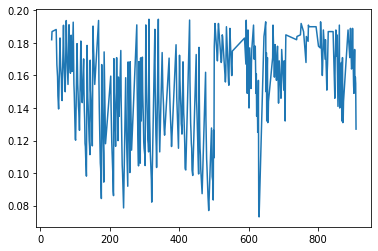

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['Droplet diameter, mm'])

In [ ]:
nFinalRows = len(df.index)
print(nFinalRows)
original_indexes = df.index
print(original_indexes)
import random
random.sample(set(original_indexes[:100]), 10)

446
Int64Index([ 33,  34,  46,  47,  48,  49,  50,  51,  52,  53,
            ...
            898, 899, 902, 903, 904, 905, 906, 907, 908, 909],
           dtype='int64', length=446)


[152, 168, 83, 90, 59, 107, 62, 33, 48, 101]

In [ ]:
#Loading test indexes
rand_index = np.loadtxt('rand_index.txt')
rand_index

array([254., 815., 357., 195., 143., 622., 873., 342., 237., 872., 825.,
       602., 372., 266., 503., 169.,  70., 193., 196., 220., 601., 651.,
       121., 174., 159., 119., 204., 771., 109., 407., 592., 706., 477.,
       906., 464., 157., 693., 415., 190., 297., 843., 268., 284., 238.,
       138., 794., 820., 161., 814., 597., 173., 466., 165., 318., 821.,
        71., 144., 344., 111., 705., 688., 898.,  99., 851., 130., 334.,
       406., 135., 536., 180., 497., 621., 405.,  85., 216., 230.])

In [ ]:
#rand_index into .txt
np.savetxt('rand_index.txt', np.squeeze(rand_index))

(446,)


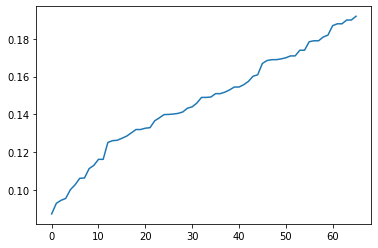

In [ ]:
#Saving test data
print(df.index.shape)
test = df[df.index.isin(rand_index)]
np.save('test_data.npy', test)
test
import matplotlib.pyplot as plt
test_data = np.load('test_data.npy')
plt.plot(np.sort(test_data[:,7]))

In [ ]:
df = df[~df.index.isin(rand_index)]
df.head(10)
print(len(df))

380


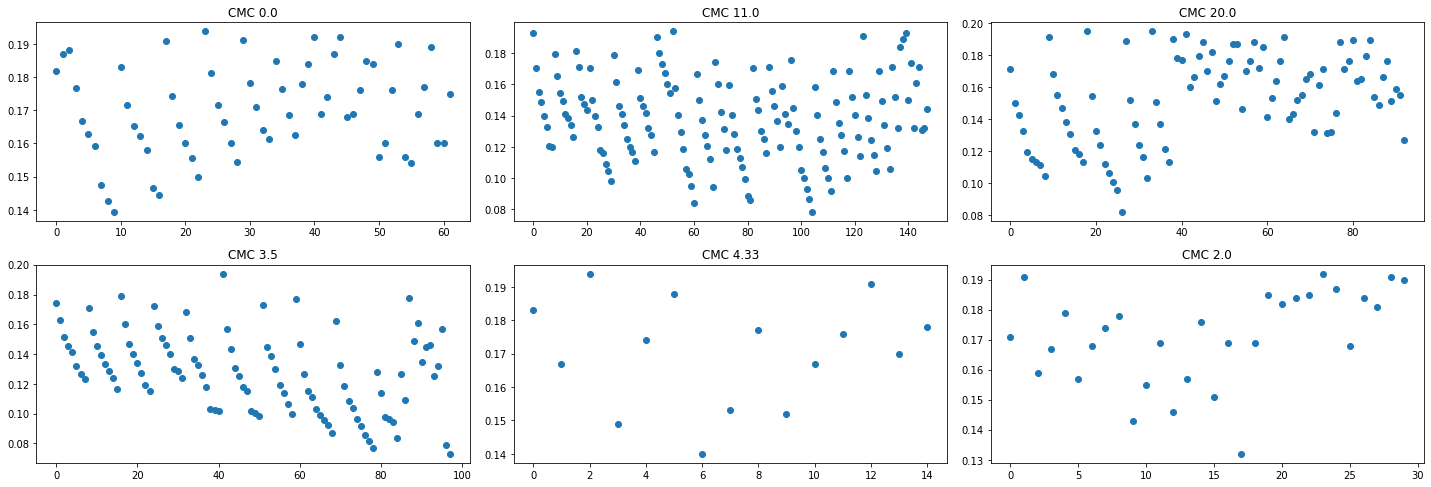

In [ ]:
CMCcategories = df['CMC, mM'].unique()
j=1
fig = plt.figure(figsize=(20,10))
for i in CMCcategories:
  plt.subplot(3,3,j)
  indices = np.where(df['CMC, mM'] == i)[0]
  plt.scatter(range(indices.shape[0]), df['Droplet diameter, mm'].iloc[indices])
  j+=1
  plt.title('CMC ' + str(i))
plt.tight_layout()

The features are then normalised due to different units

In [ ]:
meanColumns = df.mean()
print(meanColumns)
stdColumns = df.std()
print(stdColumns)
# New normalised datframe
dfNorm = (df - meanColumns)/stdColumns
dfNorm.head(50)

Flowrate continous phase, mL/min                        0.095126
Flowrate disperse phase, mL/min                         0.016574
Viscosity continous phase, mPa s                        4.600000
Viscosity disperse phase, mPa s                         6.734081
CMC, mM                                                 8.869843
Interfacial tension at solution concentration, mN/m    12.648498
Concentration, mM                                      21.493767
Droplet diameter, mm                                    0.146709
Formation time, ms                                     18.562602
CCMCratio                                               2.333243
Cad                                                     0.006751
Cac                                                     0.064492
2Qc                                                     0.190251
Qd/2Qc                                                  0.096076
dtype: float64
Flowrate continous phase, mL/min                       4.965135e-02
Flowrat

,"Flowrate continous phase, mL/min","Flowrate disperse phase, mL/min","Viscosity continous phase, mPa s","Viscosity disperse phase, mPa s","CMC, mM","Interfacial tension at solution concentration, mN/m","Concentration, mM","Droplet diameter, mm","Formation time, ms",CCMCratio,Cad,Cac,2Qc,Qd/2Qc
33,-1.110253,-0.962020,0.998878,-1.417392,-1.272498,1.893600,-0.608826,1.217373,6.615349,-0.489094,-1.238678,-0.816259,-1.110253,-1.112350
34,-1.110253,-0.838478,0.998878,-1.417392,-1.272498,1.893600,-0.608826,1.389847,1.873217,-0.489094,-1.191408,-0.816259,-1.110253,-0.779615
46,-0.707444,-0.406081,0.998878,0.703939,-1.272498,2.241017,-0.608826,1.434691,0.137534,-0.489094,-1.031387,-0.779001,-0.707444,-0.169601
47,-0.304635,-0.406081,0.998878,0.703939,-1.272498,2.241017,-0.608826,1.035633,-0.042233,-0.489094,-1.031387,-0.732023,-0.304635,-0.446880
48,0.098173,-0.406081,0.998878,0.703939,-1.272498,2.241017,-0.608826,0.687396,-0.073227,-0.489094,-1.031387,-0.685045,0.098173,-0.613247
49,0.500982,-0.406081,0.998878,0.703939,-1.272498,2.241017,-0.608826,0.556947,-0.125918,-0.489094,-1.031387,-0.638068,0.500982,-0.724159
50,0.903791,-0.406081,0.998878,0.703939,-1.272498,2.241017,-0.608826,0.429132,-0.166210,-0.489094,-1.031387,-0.591090,0.903791,-0.803382
51,1.306600,-0.406081,0.998878,0.703939,-1.272498,2.241017,-0.608826,0.025415,-0.218901,-0.489094,-1.031387,-0.544112,1.306600,-0.862799
52,1.709409,-0.406081,0.998878,0.703939,-1.272498,2.241017,-0.608826,-0.138870,-0.296386,-0.489094,-1.031387,-0.497135,1.709409,-0.909012
53,2.112217,-0.406081,0.998878,0.703939,-1.272498,2.241017,-0.608826,-0.251748,-0.314983,-0.489094,-1.031387,-0.450157,2.112217,-0.945982


0.712
232.0
Skewness: 3.857852
Kurtosis: 16.736245


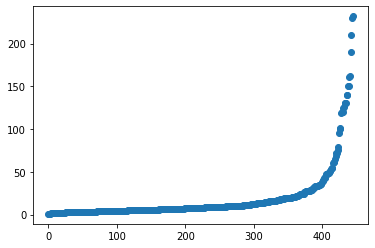

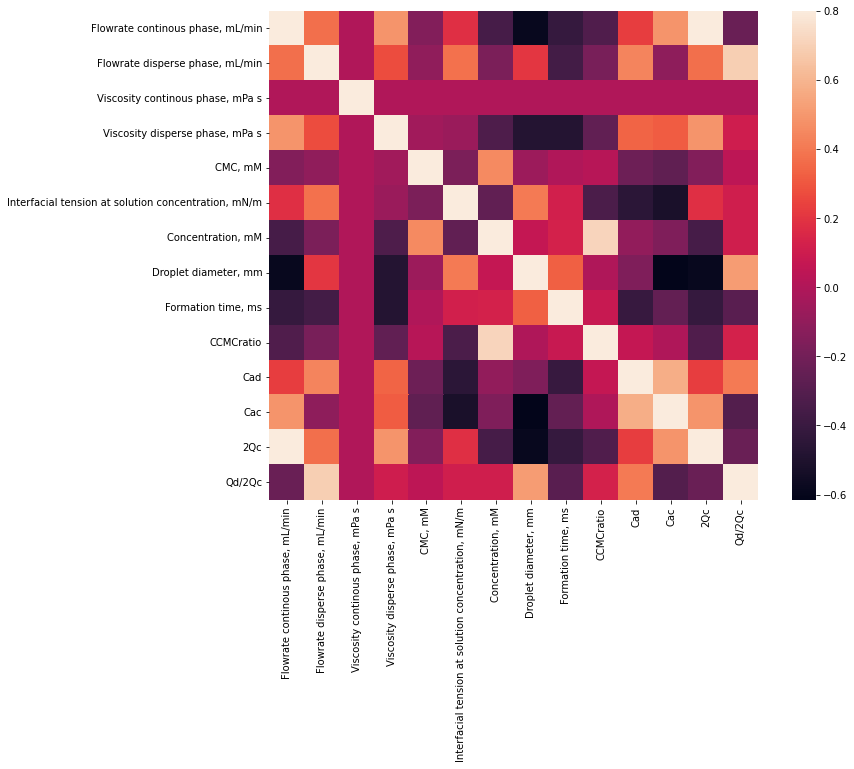

In [ ]:
import seaborn as sns
#plt.plot(df['Formation time, ms'])
print(np.min(df['Formation time, ms']))
print(np.max(df['Formation time, ms']))
sortFt = np.sort(df['Formation time, ms'])
plt.scatter(range(sortFt.shape[0]), sortFt)
print("Skewness: %f" % df['Formation time, ms'].skew())
print("Kurtosis: %f" % df['Formation time, ms'].kurt())
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

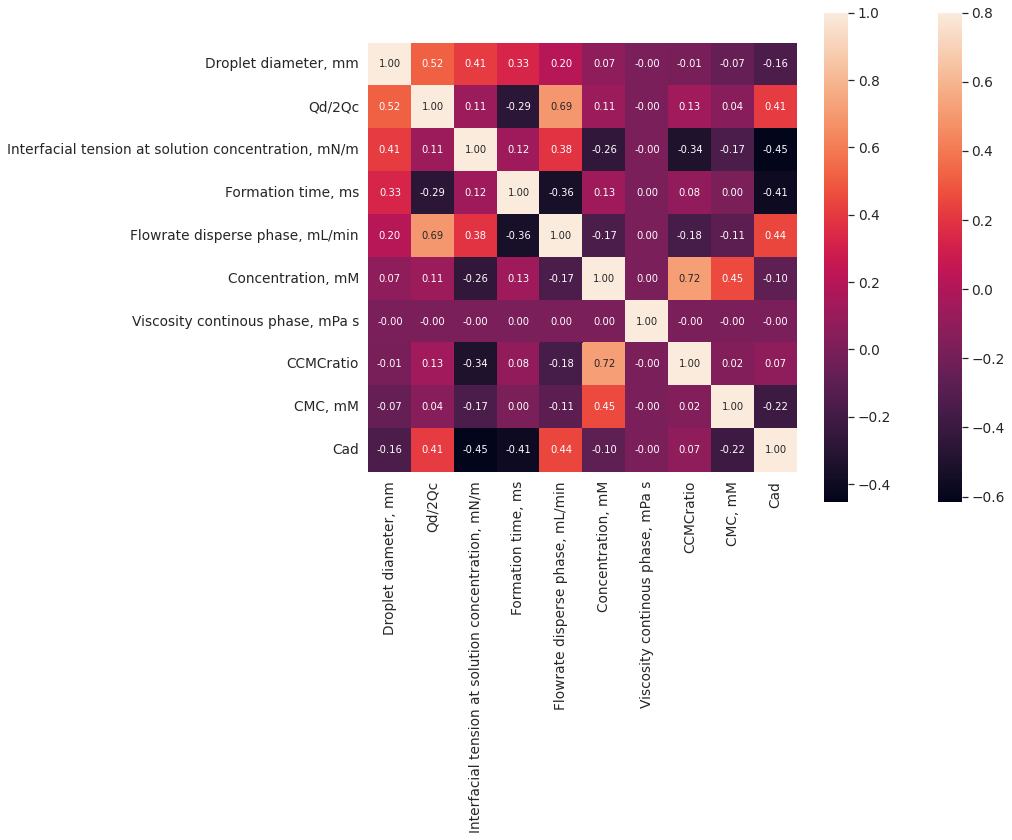

In [ ]:
#saleprice correlation matrix
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Droplet diameter, mm')['Droplet diameter, mm'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Save the normalised dataset

In [ ]:
#scatterplot
sns.set()
sns.pairplot(df, size = 2.5)
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


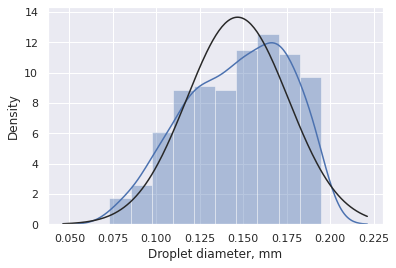

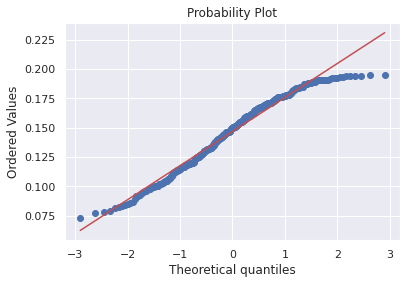

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
sns.distplot(df['Droplet diameter, mm'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Droplet diameter, mm'], plot=plt)

Index(['Flowrate continous phase, mL/min', 'Flowrate disperse phase, mL/min',
       'Viscosity continous phase, mPa s', 'Viscosity disperse phase, mPa s',
       'CMC, mM', 'Interfacial tension at solution concentration, mN/m',
       'Concentration, mM', 'Droplet diameter, mm', 'Formation time, ms',
       'CCMCratio', 'Cad', 'Cac', '2Qc', 'Qd/2Qc'],
      dtype='object')
0
1
2
3
4
5
6
7
8
9
10
11
12
13
['Flowrate disperse phase, mL/min', 'Droplet diameter, mm', 'Formation time, ms', 'CCMCratio', 'Cad', 'Cac', '2Qc', 'Qd/2Qc']
['CCMCratio', 'Cad', 'Cac', '2Qc', 'Qd/2Qc', 'Flowrate disperse phase, mL/min', 'Droplet diameter, mm', 'Formation time, ms']
    CCMCratio       Cad  ...  Droplet diameter, mm  Formation time, ms
33        0.0  0.000126  ...              0.167208            5.451038
34        0.0  0.000379  ...              0.171429            4.382027
46        0.0  0.001234  ...              0.172524            3.178054
47        0.0  0.001234  ...              0.162741     

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

2Qc
Qd/2Qc


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Flowrate disperse phase, mL/min
Droplet diameter, mm
Formation time, ms


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<Figure size 1440x720 with 0 Axes>

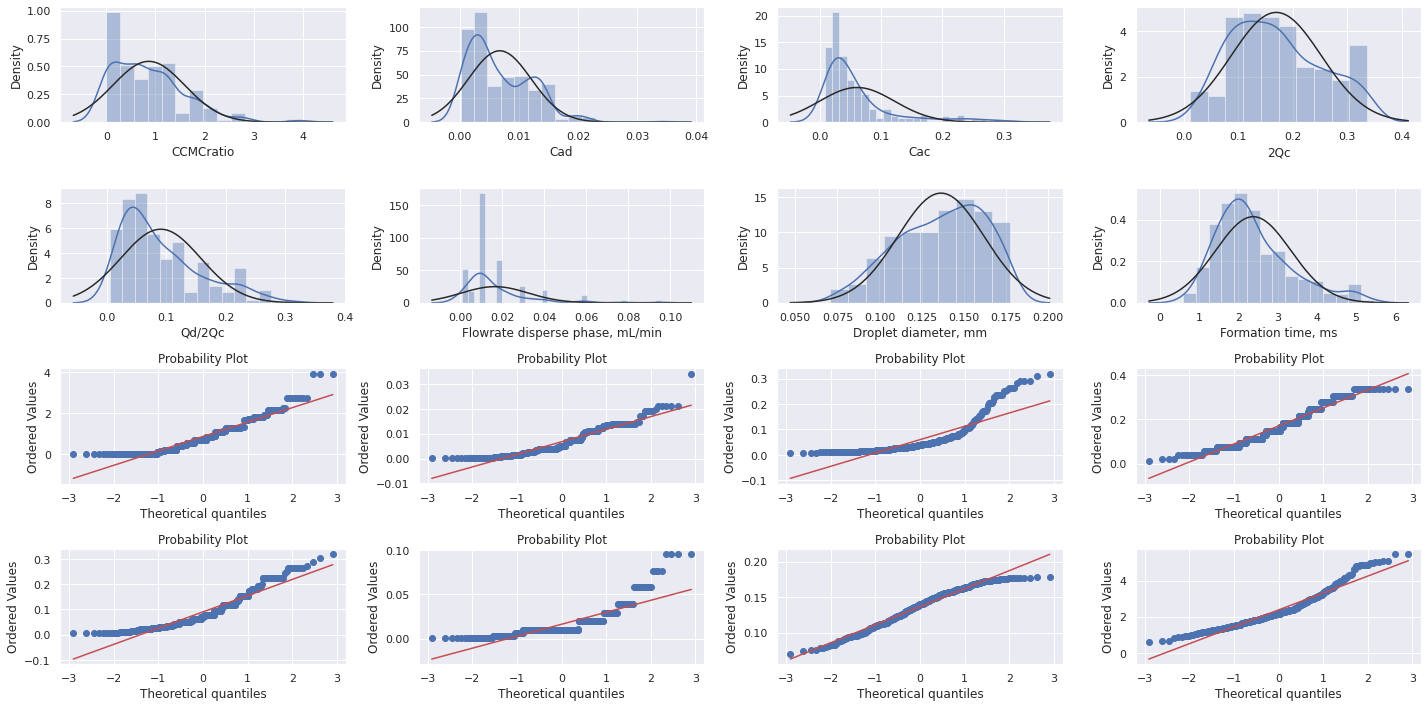

In [ ]:
#applying log transformation
#df['Formation time, ms'] = np.log(df['Formation time, ms'])
#transformed histogram and normal probability plot
#sns.distplot(df['Formation time, ms'], fit=norm);
#fig = plt.figure()
#res = stats.probplot(df['Formation time, ms'], plot=plt)
#applying log transformatiom
colNames = df.columns
print(colNames)
dflog = pd.DataFrame()
fig = plt.figure(figsize=(20,10))
col_number = df.columns.shape[0]
for i in range(col_number):
  print(i)
  dflog[colNames[i]] = np.log(df[colNames[i]]+1)
  #transformed histogram and normal probability plot

del dflog['CMC, mM']
del dflog['Concentration, mM']
del dflog['Viscosity continous phase, mPa s']
del dflog['Viscosity disperse phase, mPa s']
del dflog['Interfacial tension at solution concentration, mN/m']
del dflog['Flowrate continous phase, mL/min']
colNames = dflog.columns.tolist()
print(colNames)
colNames = colNames[-5:] + colNames[:3]
dflog = dflog[colNames]
print(colNames)
print(dflog.head(10))
fig = plt.figure(figsize=(20,10))
j=1
for i in colNames:
  print(i)
  #transformed histogram and normal probability plot
  plt.subplot(4, 4, j)
  sns.distplot(dflog[i], fit=norm);
  plt.subplot(4, 4, j+8)
  res = stats.probplot(dflog[i], plot=plt)
  j=j+1
plt.tight_layout()

CCMCratio                          0.863389
Cad                                0.006763
Cac                                0.060282
2Qc                                0.169961
Qd/2Qc                             0.090536
Flowrate disperse phase, mL/min    0.016413
Droplet diameter, mm               0.136575
Formation time, ms                 2.381498
dtype: float64
CCMCratio                          0.732492
Cad                                0.005319
Cac                                0.061324
2Qc                                0.082703
Qd/2Qc                             0.067490
Flowrate disperse phase, mL/min    0.015970
Droplet diameter, mm               0.025631
Formation time, ms                 0.961057
dtype: float64
CCMCratio
Cad
Cac


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

2Qc
Qd/2Qc
Flowrate disperse phase, mL/min


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Droplet diameter, mm
Formation time, ms


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


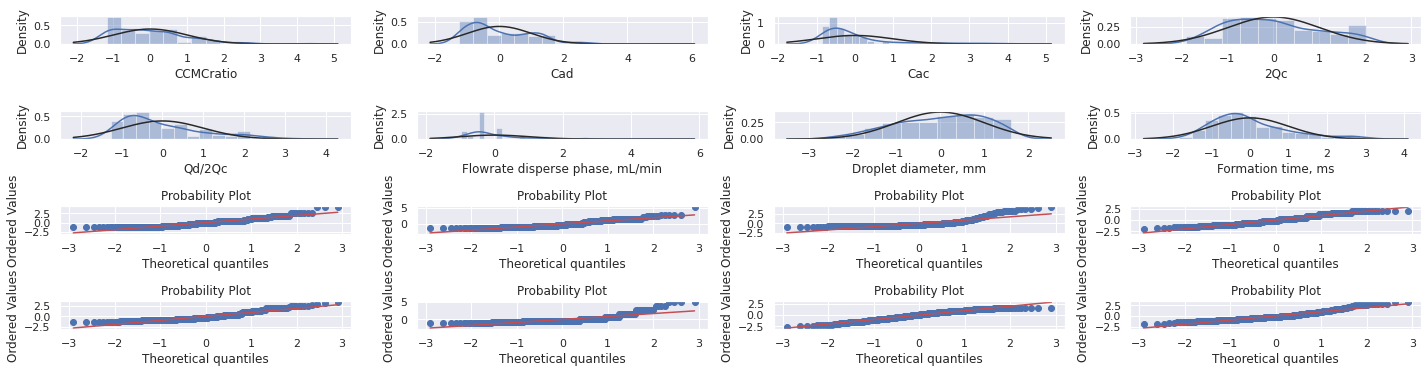

In [ ]:
meanColumns = dflog.mean()
print(meanColumns)
stdColumns = dflog.std()
print(stdColumns)
# New normalised datframe
dfNormlog = (dflog - meanColumns)/stdColumns
dfNormlog.head(50)
fig = plt.figure(figsize=(20,10))
j=1
for i in colNames:
  print(i)
  #transformed histogram and normal probability plot
  plt.subplot(8, 4, j)
  sns.distplot(dfNormlog[i], fit=norm);
  plt.subplot(8, 4, j+8)
  res = stats.probplot(dfNormlog[i], plot=plt)
  j=j+1
plt.tight_layout()

In [ ]:
np.save(directory + 'preprocessDropletData.npy', df)
np.save(directory + 'normalisedDropletData_diameter.npy', dfNorm)
np.save(directory + 'normalisedlogDropletData_diameter.npy', dfNormlog)
np.save(directory + 'logDropletData_diameter.npy', dflog)

In [ ]:
# One-hot encoding
df1H = pd.get_dummies(dflog, columns = colNames)
df1H.head(100)

,CCMCratio_0.0,CCMCratio_0.0874874541231158,CCMCratio_0.16126814759612232,CCMCratio_0.1823215567939546,CCMCratio_0.1941560144409574,CCMCratio_0.22314355131420976,CCMCratio_0.4054651081081644,CCMCratio_0.4519851237430572,CCMCratio_0.5465437063680699,CCMCratio_0.6931471805599453,CCMCratio_0.8602012652231114,CCMCratio_0.8873031950009029,CCMCratio_1.0986122886681098,CCMCratio_1.1451323043030026,CCMCratio_1.252762968495368,CCMCratio_1.349926716949016,CCMCratio_1.6650077635889111,CCMCratio_1.7129785913749407,CCMCratio_1.791759469228055,CCMCratio_1.9042374526547452,CCMCratio_2.1400661634962708,CCMCratio_2.2587824703356527,CCMCratio_2.7269186854065928,CCMCratio_3.9318256327243257,"Flowrate continous phase, mL/min_0.005982071677547469","Flowrate continous phase, mL/min_0.009950330853168092","Flowrate continous phase, mL/min_0.01980262729617973","Flowrate continous phase, mL/min_0.02955880224154443","Flowrate continous phase, mL/min_0.03922071315328133","Flowrate continous phase, mL/min_0.04879016416943205","Flowrate continous phase, mL/min_0.058268908123975824","Flowrate continous phase, mL/min_0.06765864847381486","Flowrate continous phase, mL/min_0.0769610411361284","Flowrate continous phase, mL/min_0.08617769624105241","Flowrate continous phase, mL/min_0.09531017980432493","Flowrate continous phase, mL/min_0.10436001532424286","Flowrate continous phase, mL/min_0.11332868530700327","Flowrate continous phase, mL/min_0.12221763272424911","Flowrate continous phase, mL/min_0.1310282624064042","Flowrate continous phase, mL/min_0.14842000511827322",...,"Droplet diameter, mm_0.16309297520200783","Droplet diameter, mm_0.16322368110201407","Droplet diameter, mm_0.16381808522939492","Droplet diameter, mm_0.1640727217371579","Droplet diameter, mm_0.16424244339404884","Droplet diameter, mm_0.1645987651393837","Droplet diameter, mm_0.16460605568383868","Droplet diameter, mm_0.16466662155523393","Droplet diameter, mm_0.16517539795898412","Droplet diameter, mm_0.16551443847757333","Droplet diameter, mm_0.16636153721522529","Droplet diameter, mm_0.16653087088763058","Droplet diameter, mm_0.1667001758909978","Droplet diameter, mm_0.1672079189839064","Droplet diameter, mm_0.1673175999399657","Droplet diameter, mm_0.16805358499624976","Droplet diameter, mm_0.16812120739281314","Droplet diameter, mm_0.16889853646181388","Droplet diameter, mm_0.16957398397145204","Droplet diameter, mm_0.16974277458709455","Droplet diameter, mm_0.17142911562753102","Droplet diameter, mm_0.17227122094045313","Droplet diameter, mm_0.17252371431384353","Droplet diameter, mm_0.17260786460631564","Droplet diameter, mm_0.17311261770864483","Droplet diameter, mm_0.17395330712343798","Droplet diameter, mm_0.17428938509669029","Droplet diameter, mm_0.17470932379181314","Droplet diameter, mm_0.1747932903731631","Droplet diameter, mm_0.17487724990471823","Droplet diameter, mm_0.1749046317815312","Droplet diameter, mm_0.17496120238766222","Droplet diameter, mm_0.17563256864315796","Droplet diameter, mm_0.17630348446839167","Droplet diameter, mm_0.1764711431157791","Droplet diameter, mm_0.17714149675241242","Droplet diameter, mm_0.17718926910769328","Droplet diameter, mm_0.1773090149704103","Droplet diameter, mm_0.17739276355720185","Droplet diameter, mm_0.17781140131606846"
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0